# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его

        pred_y = X @ w
        r = pred_y - y
        return np.mean(r ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

        pred_y = X @ w
        r = pred_y - y
        return (2.0 / X.shape[0]) * (X.T @ r)


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --

    w = w_init.astype(float).copy()

    trajectory = [w.copy()]

    for _ in range(n_iterations):
      w = w - lr * loss.calc_grad(X, y, w)
      trajectory.append(w.copy())
    return trajectory




Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

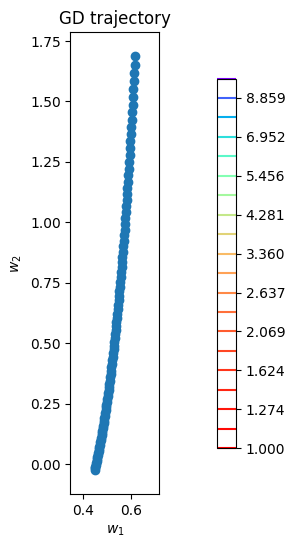

27.079138626093872 0.0001


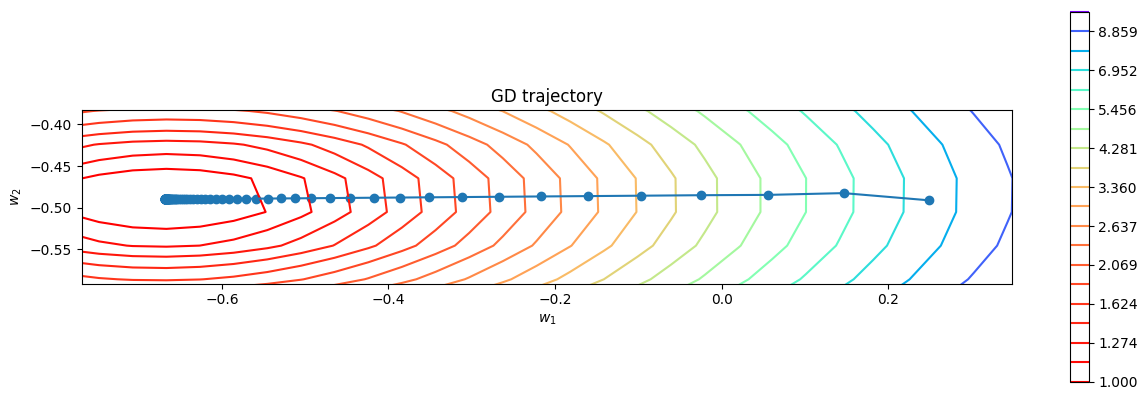

0.8670644402975207 0.007235714285714286


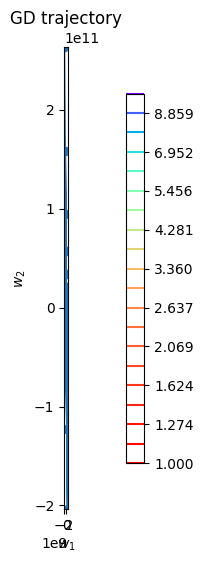

5.515503180169329e+24 0.014371428571428571


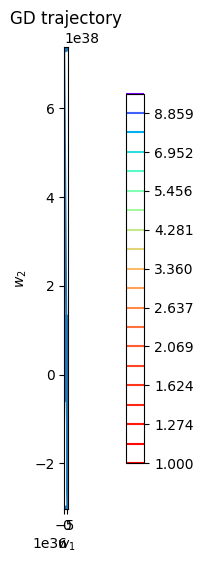

4.3340701342557615e+79 0.021507142857142857


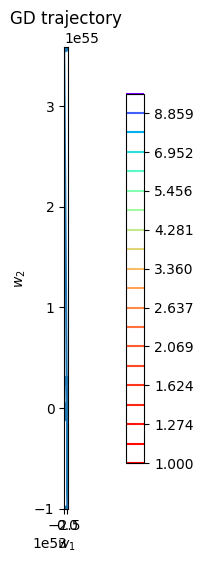

1.0238244584286243e+113 0.028642857142857144


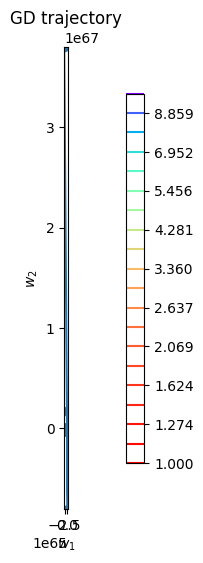

1.1497552646878392e+137 0.03577857142857143


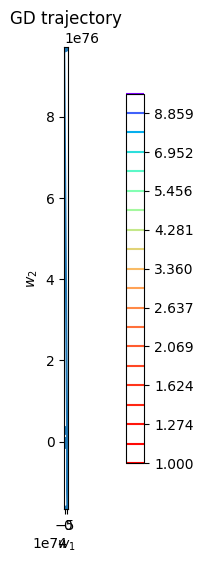

7.504005931476398e+155 0.04291428571428572


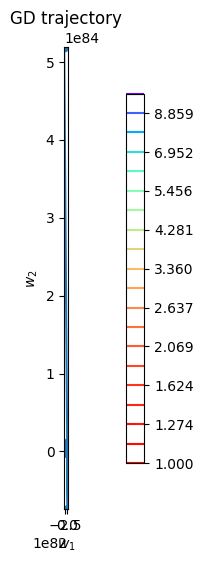

2.1441907631054066e+171 0.050050000000000004


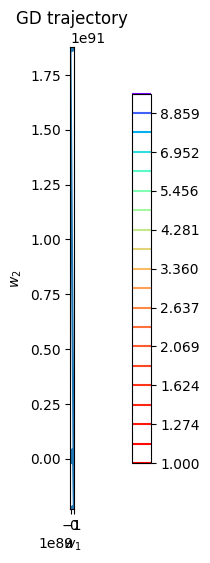

2.805243484441961e+184 0.05718571428571429


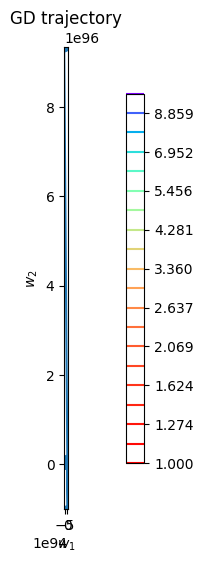

6.939189418841381e+195 0.06432142857142857


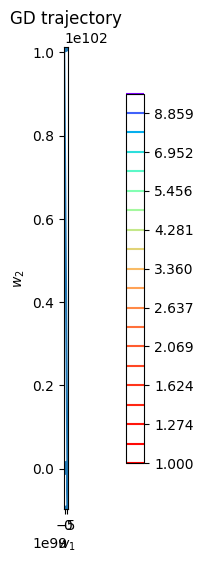

8.165703597191576e+205 0.07145714285714286


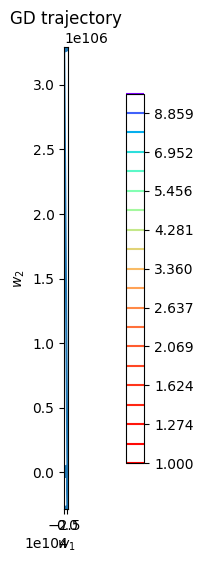

8.618346704423677e+214 0.07859285714285714


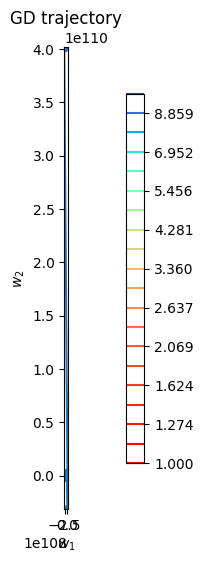

1.2853980759821988e+223 0.08572857142857143


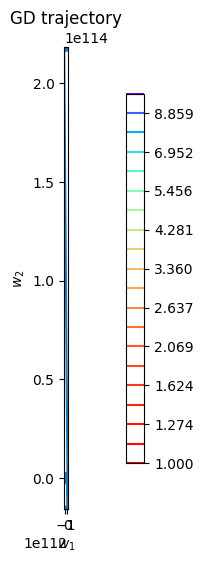

3.795043669195061e+230 0.09286428571428572


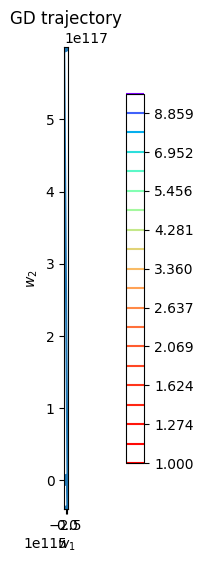

2.867494833868979e+237 0.1


In [9]:
# -- YOUR CODE HERE --
lrs = np.linspace(0.0001, 0.1, 15)
for lr in lrs:
  w_list = gradient_descent(w_init, X, y, loss, lr, 100)
  plot_gd(w_list[3:], X, y, loss)
  print(loss.calc_loss(X, y, w_list[-1]), lr)



Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --

    w = w_init.astype(float).copy()
    traj: List[np.ndarray] = []
    n = X.shape[0]

    for _ in range(n_iterations):
        idx = np.random.choice(n, size=min(batch_size, n), replace=False)
        Xb = X[idx]
        yb = y[idx]
        grad = loss.calc_grad(Xb, yb, w)
        w = w - lr * grad
        traj.append(w.copy())

    return traj




**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

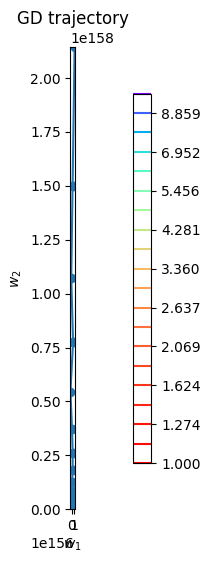

/tmp/ipython-input-2868670014.py:15: RuntimeWarning: overflow encountered in square
  return np.mean(r ** 2)


inf -0.002764285714285714


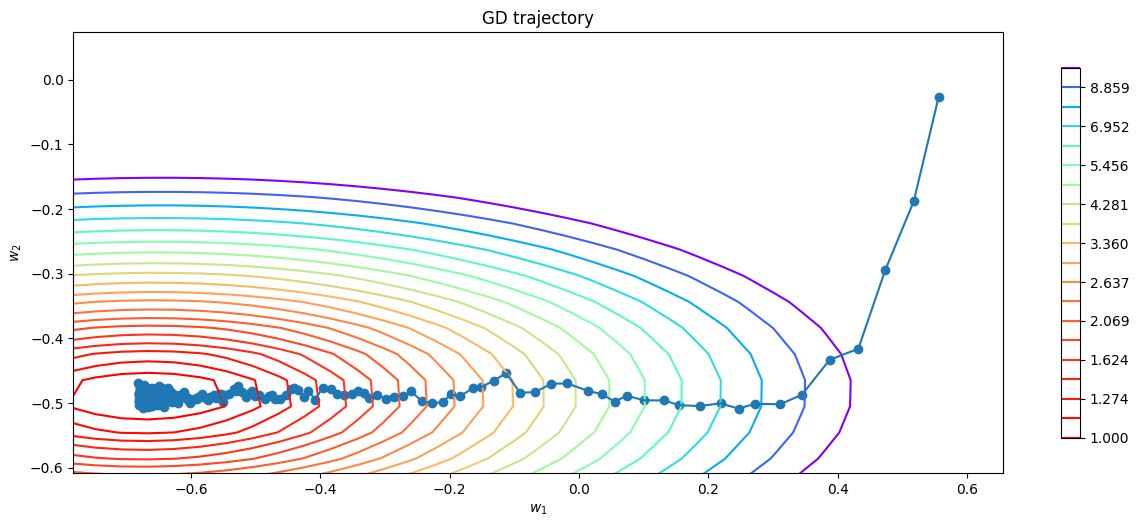

0.8685954710338134 0.0022357142857142853


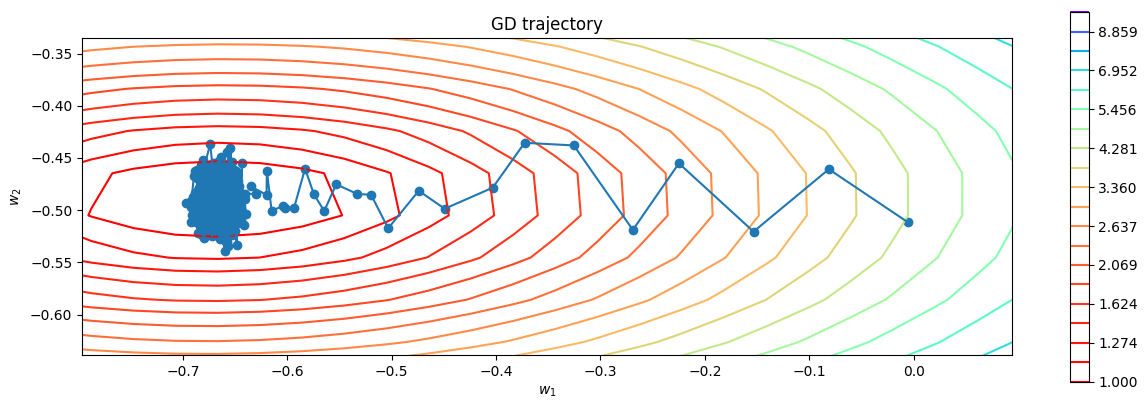

0.8704718255734648 0.0072357142857142846


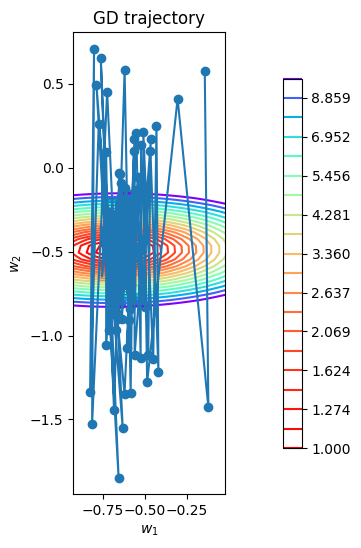

1.0867199729098078 0.012235714285714284


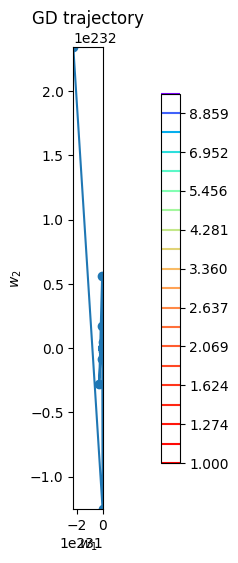

inf 0.017235714285714285


In [11]:
# @title
# -- YOUR CODE HERE --

lrs = np.linspace(0.007235714285714286 - 0.01, 0.007235714285714286 + 0.01, 5)
for lr in lrs:
  w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, 50)
  plot_gd(w_list[3:], X, y, loss)
  print(loss.calc_loss(X, y, w_list[-1]), lr)


Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --

    s0 = 1

    w = w_init.astype(float).copy()
    traj: List[np.ndarray] = []
    n = X.shape[0]



    for t in range(n_iterations):
        idx = np.random.choice(n, size=min(batch_size, n), replace=False)
        Xb = X[idx]
        yb = y[idx]
        grad = loss.calc_grad(Xb, yb, w)
        lr_it = lr * (s0 / (s0 + t))**p
        w = w - lr_it * grad
        traj.append(w.copy())

    return traj



**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

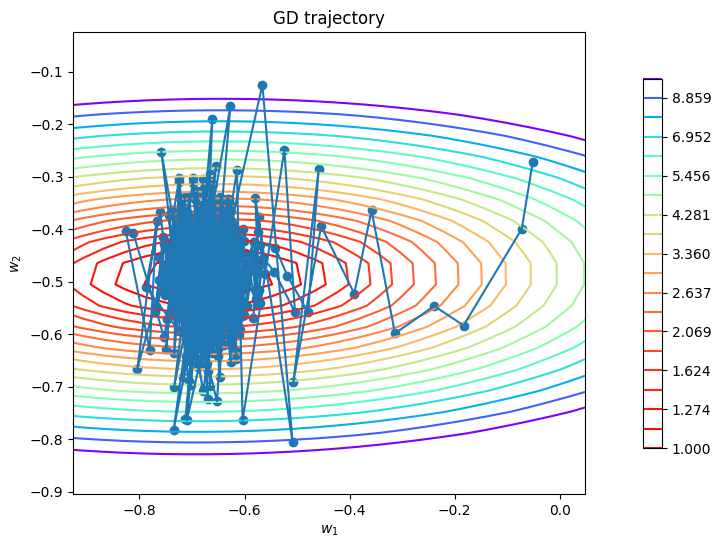

loss = 2.0998342820500047  p= 0.0


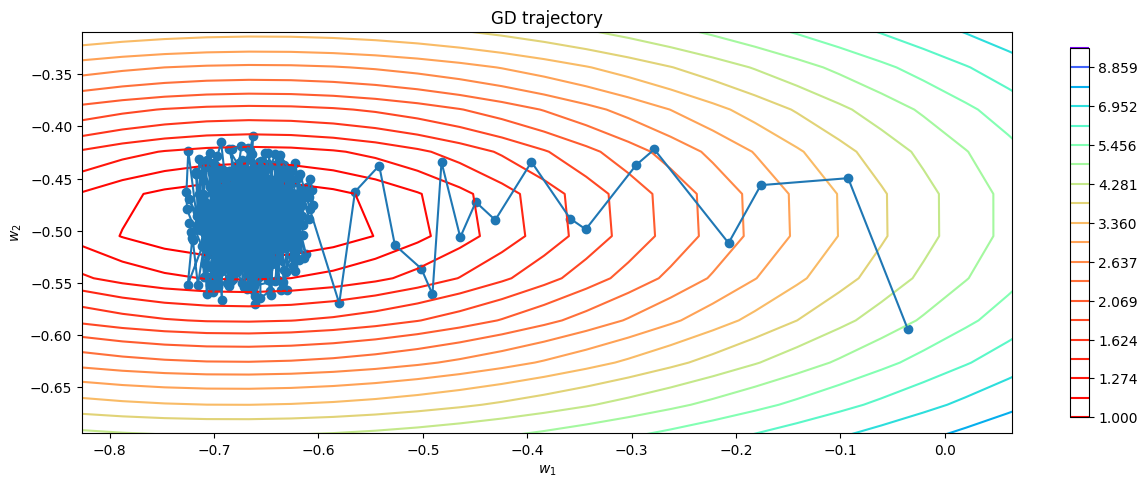

loss = 0.9605854010160237  p= 0.1111111111111111


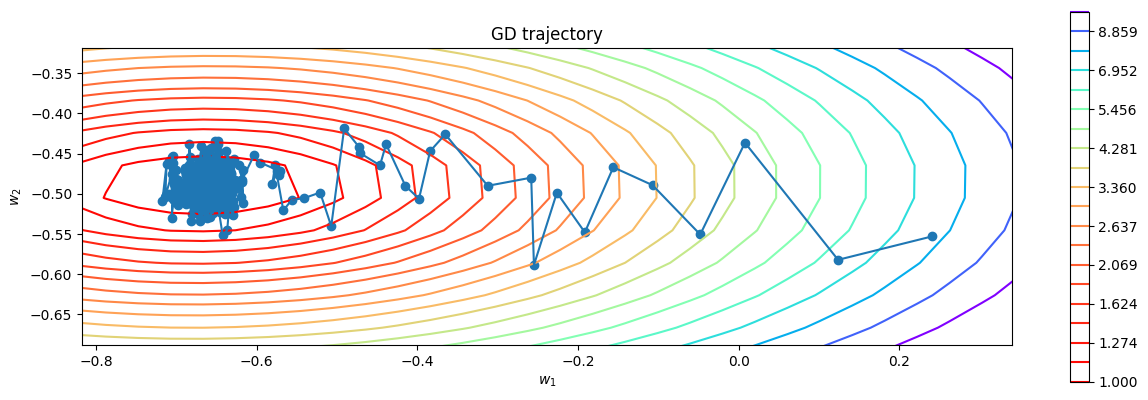

loss = 0.867438260133317  p= 0.2222222222222222


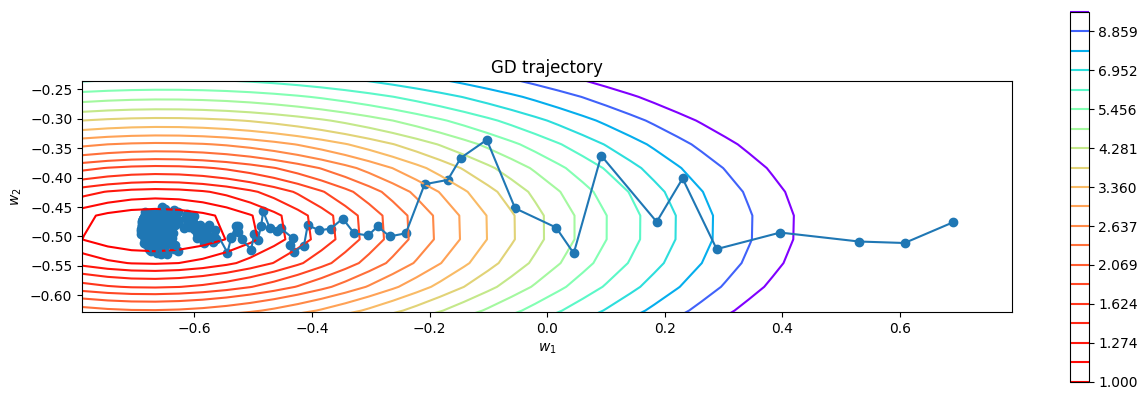

loss = 0.8685384557047358  p= 0.3333333333333333


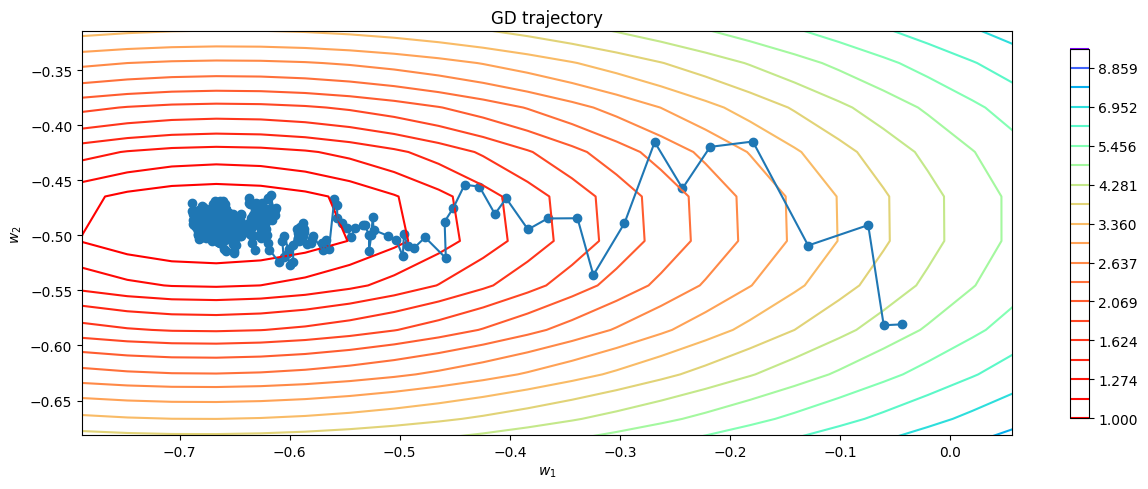

loss = 0.8673979576649269  p= 0.4444444444444444


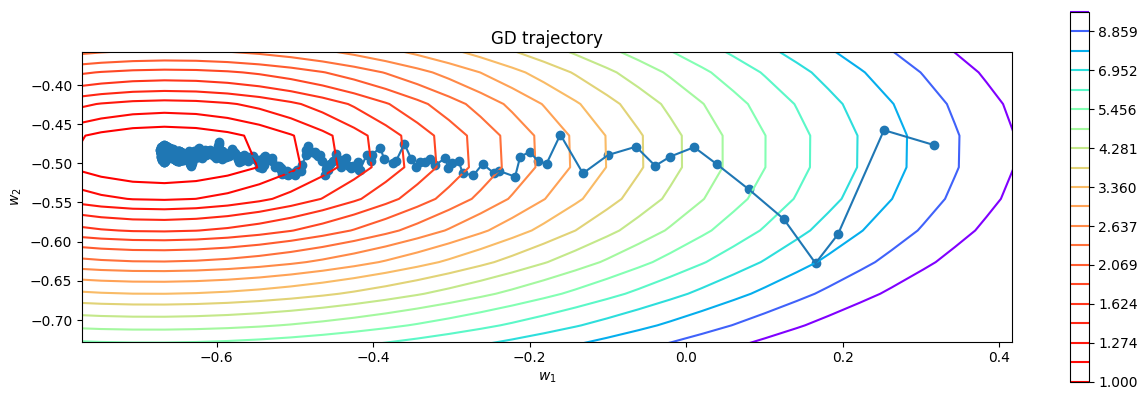

loss = 0.8679230075878606  p= 0.5555555555555556


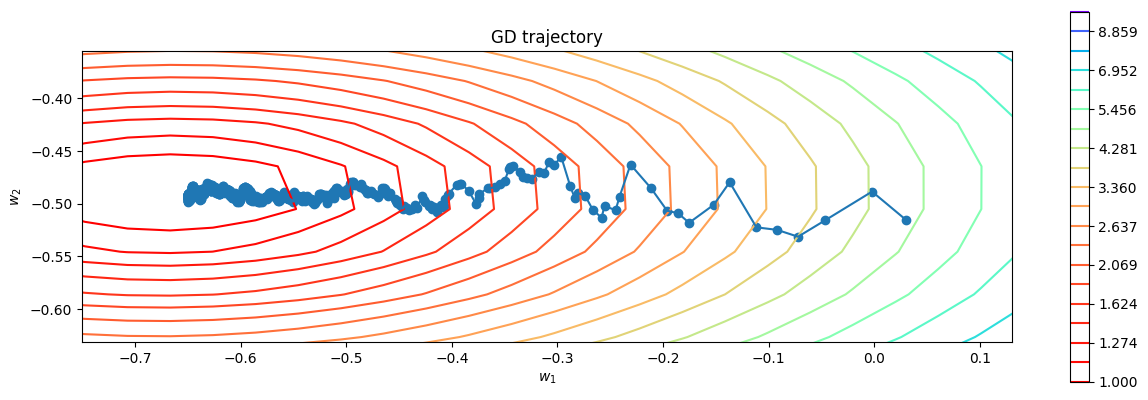

loss = 0.8738221030230258  p= 0.6666666666666666


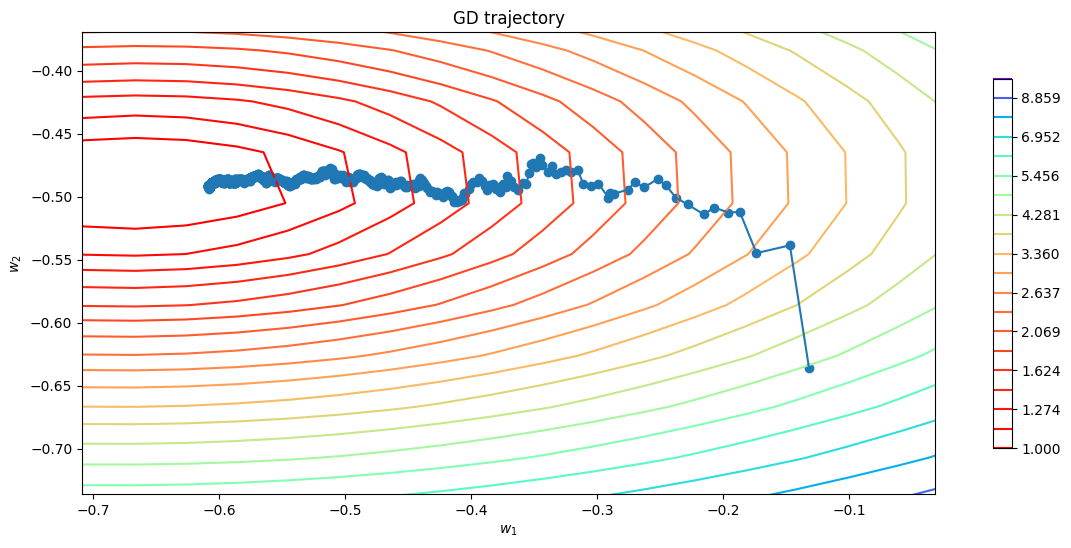

loss = 0.8941480515675215  p= 0.7777777777777777


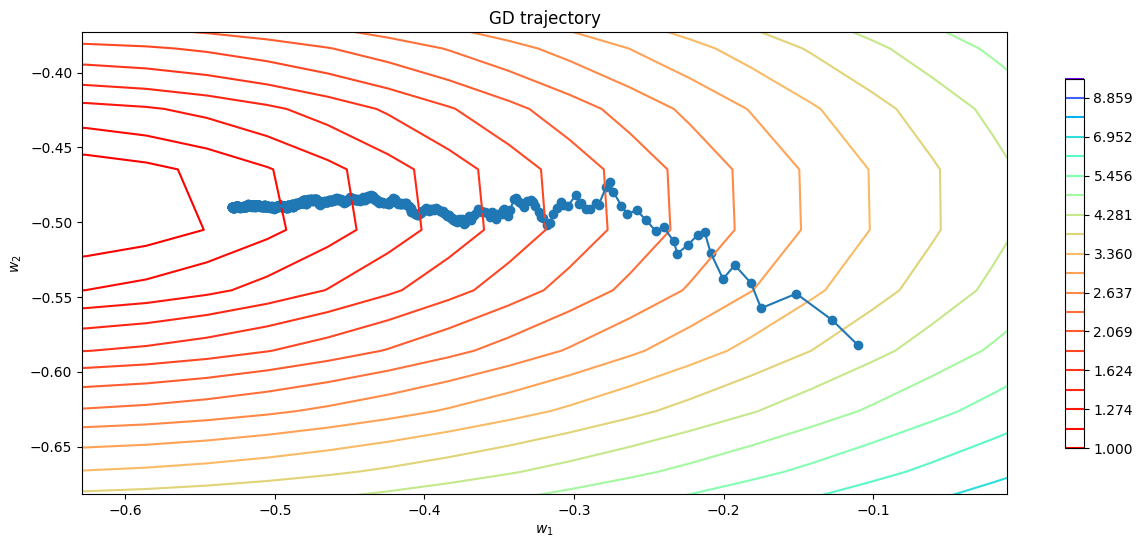

loss = 1.0162559433464184  p= 0.8888888888888888


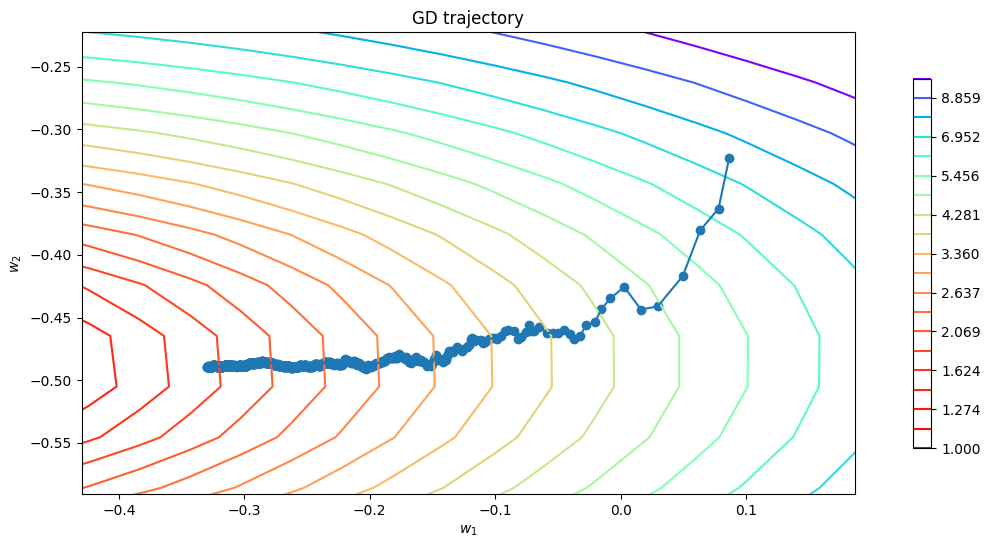

loss = 1.7490883550747154  p= 1.0


In [13]:
# -- YOUR CODE HERE --

ps = np.linspace(0, 1, 10)
for p in ps:
  w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p)
  plot_gd(w_list[3:], X, y, loss)
  print("loss =", loss.calc_loss(X, y, w_list[-1])," p=" , p)

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

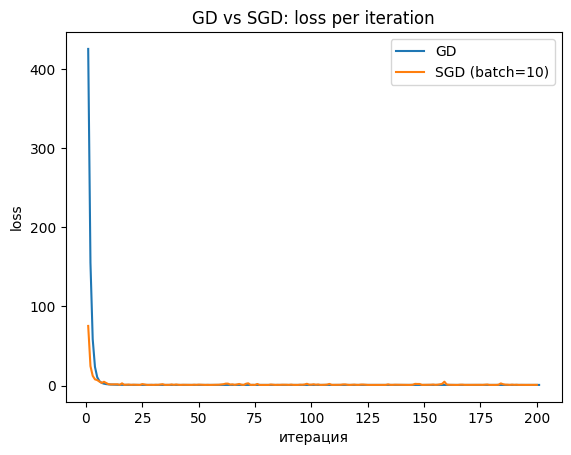

In [14]:
# -- YOUR CODE HERE --


lr = 1e-2
n_iterations = 200
batch_size = 10


traj_gd  = gradient_descent(w_init, X, y, loss, lr, n_iterations)

traj_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p=0.0, n_iterations=n_iterations)

loss_gd  = [loss.calc_loss(X, y, w) for w in traj_gd]
loss_sgd = [loss.calc_loss(X, y, w) for w in traj_sgd]

import matplotlib.pyplot as plt
plt.plot(range(1, len(loss_gd)+1),  loss_gd,  label="GD")
plt.plot(range(1, len(loss_sgd)+1), loss_sgd, label="SGD (batch=10)")
plt.xlabel("итерация"); plt.ylabel("loss"); plt.legend(); plt.title("GD vs SGD: loss per iteration")
plt.show()



## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr

        self.w = None
        self.history = {}

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X_aug = np.hstack([X, np.ones((X.shape[0], 1))])

        # -- YOUR CODE HERE --

        w0 = np.zeros(X_aug.shape[1], dtype=float)

        trajectory = gradient_descent(
            w_init=w0,
            X=X_aug,
            y=y,
            loss=self.loss,
            lr=self.lr
        )

        self.w = trajectory[-1]
        return self



        return self

    def predict(self, X: np.ndarray) -> np.ndarray:

        n = X.shape[1]
        if (self.w is None) or (not np.isfinite(self.w).all()):
          self.w = np.random.normal(0, 1/np.sqrt(n+1), size=n+1)

        X = np.asarray(X, dtype=float)
        X_aug = np.hstack([X, np.ones((X.shape[0], 1))])
        return X_aug @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [18]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [19]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   201 non-null    int64  
 1   0       201 non-null    int64  
 2   1       164 non-null    float64
 3   2       201 non-null    object 
 4   3       201 non-null    object 
 5   4       201 non-null    object 
 6   5       199 non-null    object 
 7   6       201 non-null    object 
 8   7       201 non-null    object 
 9   8       201 non-null    object 
 10  9       201 non-null    float64
 11  10      201 non-null    float64
 12  11      201 non-null    float64
 13  12      201 non-null    float64
 14  13      201 non-null    int64  
 15  14      201 non-null    object 
 16  15      201 non-null    object 
 17  16      201 non-null    int64  
 18  17      201 non-null    object 
 19  18      197 non-null    float64
 20  19      197 non-null    float64
 21  20      201 non-null    float64
 22  21

In [20]:
X_raw.sample(4)

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
171,175,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,...,four,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32
47,50,1,104.0,mazda,gas,std,two,hatchback,fwd,front,...,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31
149,153,0,77.0,toyota,gas,std,four,wagon,fwd,front,...,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37
17,18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,...,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [21]:
# -- YOUR CODE HERE --

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_cols = X_raw.select_dtypes(include=[np.number]).columns
cat_cols = X_raw.select_dtypes(exclude=[np.number]).columns

X_raw[num_cols] = X_raw[num_cols].fillna(X_raw[num_cols].mean())


for c in cat_cols:
    m = X_raw[c].mode(dropna=True)
    fill_val = m.iat[0] if not m.empty else 'missing'
    X_raw[c] = X_raw[c].fillna(fill_val)




cat_cols = X_raw.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_raw[cat_cols])
X_encoded_df = pd.DataFrame(
    X_encoded,
    columns=encoder.get_feature_names_out(cat_cols.astype(str))
)
X_raw = pd.concat([X_encoded_df, X_raw.drop(columns=cat_cols)], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_numpy())
X_test = scaler.transform(X_test.to_numpy())


X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2_alfa-romero    201 non-null    float64
 1   2_audi           201 non-null    float64
 2   2_bmw            201 non-null    float64
 3   2_chevrolet      201 non-null    float64
 4   2_dodge          201 non-null    float64
 5   2_honda          201 non-null    float64
 6   2_isuzu          201 non-null    float64
 7   2_jaguar         201 non-null    float64
 8   2_mazda          201 non-null    float64
 9   2_mercedes-benz  201 non-null    float64
 10  2_mercury        201 non-null    float64
 11  2_mitsubishi     201 non-null    float64
 12  2_nissan         201 non-null    float64
 13  2_peugot         201 non-null    float64
 14  2_plymouth       201 non-null    float64
 15  2_porsche        201 non-null    float64
 16  2_renault        201 non-null    float64
 17  2_saab          

In [22]:
X_train.shape, y_train.shape

((140, 75), (140,))

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [23]:
# -- YOUR CODE HERE --


def mse(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return np.mean((y_true - y_pred)**2)


y_pred = linear_regression.predict(X_test)


print(mse(y_test, y_pred))

linear_regression.fit(X_train, y_train)




299132207.64545614


**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [24]:


y_pred = linear_regression.predict(X_test)


print(mse(y_test, y_pred))

y_pred = linear_regression.predict(X_train)
print(mse(y_train, y_pred))


9358535.197099367
1195417.006534872


In [25]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE --

y_pred = linear_regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

y_pred = linear_regression.predict(X_train)
print(mean_squared_error(y_train, y_pred))


9358535.197099367
1195417.006534872


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [26]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его

        pred_y = X @ w
        r = pred_y - y
        return np.mean(r ** 2) + self.coef * (w[:-1] @ w[:-1].T)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

        pred_y = X @ w
        r = pred_y - y
        return (2.0 / X.shape[0]) * (X.T @ r) + 2 * self.coef * np.concatenate([w[:-1], np.array([0.0])], axis=0)



Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [27]:
linear_regression = LinearRegression(MSEL2Loss(0.05))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [28]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)


y_pred = linear_regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

y_pred = linear_regression.predict(X_train)
print(mean_squared_error(y_train, y_pred))




7771565.971030977
1626007.297936496


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [29]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float, coef: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его


        pred_y = X @ w
        r = pred_y - y

        r_hub = np.where(abs(r) < self.eps, 0.5 * r*r, self.eps * (abs(r) - 0.5 * self.eps))
        return np.mean(r_hub)  + self.coef * (w[:-1] @ w[:-1].T)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        pred_y = X @ w
        r = pred_y - y

        r_hub = np.where(abs(r) < self.eps, r, 2 * self.eps * ((r > 0) - 0.5))
        return (1.0 / X.shape[0]) * (X.T @ r_hub) +  2 * self.coef * np.concatenate([w[:-1], np.array([0.0])], axis=0)



**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [31]:
# -- YOUR CODE HERE --

linear_regression = LinearRegression(HuberLoss(40, 0.05))


linear_regression.fit(X_train, y_train)


y_pred = linear_regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

y_pred = linear_regression.predict(X_train)
print(mean_squared_error(y_train, y_pred))



61696215.80861355
25500538.01839016


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE --



### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

GD final train loss: 1935407.4437940281
SA final train loss: 207876931.8006248
GD test loss: 7918886.556350051
SA test loss: 295115858.20788795


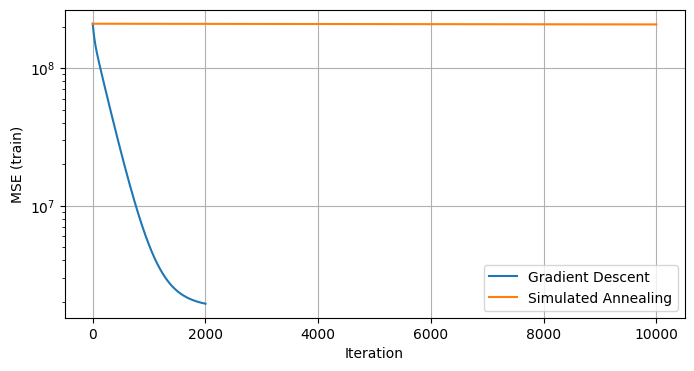

In [33]:
# -- YOUR CODE HERE --

def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    n_iterations: int = 5000,
    t0: float = 1.0,
    alpha: float = 0.99,
    t_min: float = 1e-3,
    step_scale: float = 0.1,
    df: int = 3,
) -> List[np.ndarray]:
    """
    Алгоритм имитации отжига для минимизации произвольного лосса.
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    :param n_iterations: int -- сколько итераций делать
    :param t0: float -- начальная температура
    :param alpha: float -- множитель геометрического охлаждения температуры
    :param t_min: float -- минимальная температура
    :param step_scale: float -- масштаб шага для предложения нового w
    :param df: int -- число степеней свободы для распределения Стьюдента
    :return: список np.ndarray -- траектория весов
    """
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)

    w_current = w_init.astype(float).copy()
    current_loss = loss.calc_loss(X, y, w_current)

    best_w = w_current.copy()
    best_loss = current_loss

    trajectory: List[np.ndarray] = [w_current.copy()]
    T = t0

    for _ in range(n_iterations):

        proposal = w_current + step_scale * np.random.standard_t(df, size=w_current.shape)
        proposal_loss = loss.calc_loss(X, y, proposal)
        delta = proposal_loss - current_loss


        if (delta <= 0) or (np.random.rand() < np.exp(-delta / max(T, 1e-12))):
            w_current = proposal
            current_loss = proposal_loss

            if proposal_loss < best_loss:
                best_loss = proposal_loss
                best_w = proposal.copy()

        trajectory.append(w_current.copy())
        T = max(t_min, T * alpha)

    return trajectory


X_train_aug = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_aug = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

loss = MSELoss()


w0 = np.zeros(X_train_aug.shape[1], dtype=float)


gd_trajectory = gradient_descent(
    w_init=w0,
    X=X_train_aug,
    y=np.asarray(y_train),
    loss=loss,
    lr=1e-3,
    n_iterations=2000,
)

sa_trajectory = simulated_annealing(
    w_init=w0,
    X=X_train_aug,
    y=np.asarray(y_train),
    loss=loss,
    n_iterations=10000,
    t0=10.0,
    alpha=0.999,
    step_scale=0.01,
    df=5,
)

def trajectory_losses(traj: List[np.ndarray], X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    return [loss.calc_loss(X, y, w) for w in traj]

gd_losses = trajectory_losses(gd_trajectory, X_train_aug, np.asarray(y_train), loss)
sa_losses = trajectory_losses(sa_trajectory, X_train_aug, np.asarray(y_train), loss)

print("GD final train loss:", gd_losses[-1])
print("SA final train loss:", sa_losses[-1])

print("GD test loss:", loss.calc_loss(X_test_aug, np.asarray(y_test), gd_trajectory[-1]))
print("SA test loss:", loss.calc_loss(X_test_aug, np.asarray(y_test), sa_trajectory[-1]))

plt.figure(figsize=(8, 4))
plt.plot(gd_losses, label="Gradient Descent")
plt.plot(sa_losses, label="Simulated Annealing")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("MSE (train)")
plt.legend()
plt.grid(True)
plt.show()


